In [2]:
# Importing all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings("ignore")

 - Loading csv file into dataframe 

In [3]:
df = pd.read_csv("raw_data.csv")

In [4]:
df.tail()

,id,gender,dob,income,marital_status,city,last_purchase_date,score
2564675,278d8e62-e08f-4ddc-9a2c-c1acafbff89c,Male,1975-04-26,20621,Widowed,Portland,2011-02-18,959
2564676,8d8591b5-f4d4-4a8d-b189-e6bde52ca3f4,Male,23-01-1983,13712,Married,Baltimore,2017-09-28,692
2564677,d026ad35-f992-43ca-918a-a760e43615be,Male,28-01-1976,62958,Widowed,Nashville,06-12-2015,471
2564678,a03048e4-ec77-4eca-8de2-2a6450e3c451,Female,1979-10-01,1082,Divorced,Milwaukee,2015-03-28,65
2564679,d189825b-aaff-47aa-9b75-826682a68828,Female,14-01-1988,48298,Widowed,Oklahoma City,2017-08-13,820


- Checking Rows and columns 

In [5]:
df.shape

(2564680, 8)

- Checking Unique values

In [6]:
dict = {}
for i in list(df.columns):
    dict[i] = df[i].value_counts().shape[0]

#dict
pd.DataFrame(dict,index=["unique count"]).transpose()

,unique count
id,100000
gender,2
dob,20674
income,62975
marital_status,4
city,49
last_purchase_date,8736
score,1000


- Checking Null Values

In [7]:
df.isnull().sum()

id                         0
gender                234849
dob                        0
income                     0
marital_status        285195
city                   51187
last_purchase_date         0
score                      0
dtype: int64

<Figure size 720x432 with 0 Axes>

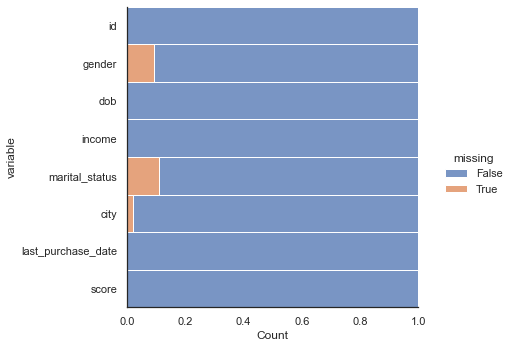

In [10]:
# Displaying total missing values in displot
plt.figure(figsize=(10,6))

sns.set_theme(style='white')
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
#plt.savefig("visualizing_missing_data_.png", dpi=100)


- Handling Duplicate values 

In [12]:
dup = df[df.duplicated()]
dup.head()

,id,gender,dob,income,marital_status,city,last_purchase_date,score
30,72607e18-1ad5-4938-b4d8-815283bdde86,Male,1997-01-24,23242,Single,Memphis,07-02-2017,202
256,619a8262-03fe-47cc-8a66-401400833c07,NaN,07-03-1990,25347,NaN,Colorado Springs,13-06-2010,304
395,5ebd754b-dabc-462d-a367-b7e6e89c1c5a,Female,2000-03-02,93518,Widowed,New York,08-04-2019,477
546,862ac52a-a593-4ee0-8209-f752c6d9d852,Female,1998-11-06,15211,Married,Phoenix,13-08-2013,29
625,32f9b5c1-86fc-4ac2-9441-67428d312d74,Female,14-04-1977,85078,Single,NaN,17-05-2015,172


In [13]:
#Total Duplicate values
df.duplicated().count()

2564680

In [14]:
#Droping duplicates values from main Dataframe
df.drop_duplicates(inplace=True)

In [15]:
#After droping duplicate values..
df.shape

(100000, 8)

- Handling Null values with the mean of the respective columns. 

In [75]:
data = df.copy()
data.head()

,id,gender,dob,income,marital_status,city,last_purchase_date,score
0,660ba2ad-e4ba-4e56-bc36-8a2daa77dd23,Male,1977-05-19,46532,Single,Oklahoma City,2020-06-22,63
1,6da25e92-ad6a-458b-a9b9-0995e664d229,Female,2000-11-28,13734,Single,Columbus,08-04-2020,43
2,11261389-dce2-4912-bd48-e406288f2a8b,Female,1975-06-05,36282,Single,Miami,2022-08-21,882
3,c9f67b5a-fcbf-4da0-bf31-c8d2492013ca,Male,27-05-1992,83451,Divorced,Colorado Springs,18-12-2020,653
4,d3024d83-cbd1-481a-8e29-a37259107dfb,Female,1987-09-13,58351,NaN,New Orleans,2021-05-25,535


In [76]:
#Filling NaN values with the mode of the respective columns
data['gender'].fillna(data['gender'].mode()[0], inplace=True)
data['marital_status'].fillna(data['marital_status'].mode()[0], inplace=True)
data['city'].fillna(data['city'].mode()[0], inplace=True)

In [77]:
data.isnull().sum()

id                    0
gender                0
dob                   0
income                0
marital_status        0
city                  0
last_purchase_date    0
score                 0
dtype: int64

Seeing no null values giving me Inner peace -_-

- Fixing Dob into yyyy-mm-dd format

In [78]:
# bringing in yyyy-mm-dd
data['dob'] = pd.to_datetime(data.dob, errors='coerce')
# Then in dd-mm-yyyy
#data['dob'] = data['dob'].dt.strftime('%d-%m-%Y')

In [55]:
data.head(10)

,id,gender,dob,income,marital_status,city,last_purchase_date,score
0,660ba2ad-e4ba-4e56-bc36-8a2daa77dd23,Male,1977-05-19,46532,Single,Oklahoma City,2020-06-22,63
1,6da25e92-ad6a-458b-a9b9-0995e664d229,Female,2000-11-28,13734,Single,Columbus,08-04-2020,43
2,11261389-dce2-4912-bd48-e406288f2a8b,Female,1975-06-05,36282,Single,Miami,2022-08-21,882
3,c9f67b5a-fcbf-4da0-bf31-c8d2492013ca,Male,1992-05-27,83451,Divorced,Colorado Springs,18-12-2020,653
4,d3024d83-cbd1-481a-8e29-a37259107dfb,Female,1987-09-13,58351,Divorced,New Orleans,2021-05-25,535
5,748a9099-0ff1-46c1-b87b-574ea150aed9,Female,1990-08-18,47585,Married,Las Vegas,2018-04-17,639
6,a2c8d5b7-1ec2-49a9-88ee-07a9edd936ef,Female,1980-02-02,59336,Married,Kansas City,05-06-2010,974
7,add68c67-6249-432f-a382-8f8f961939cf,Female,1987-06-22,97629,Single,New Orleans,08-12-2018,162
8,ae4aba25-bc9e-4d31-9cea-f21406efd7a1,Male,1998-06-11,81892,Widowed,Houston,05-08-2011,472
9,a4739371-a97a-4436-a8c0-8365c4c7b148,Male,1999-04-18,15196,Divorced,San Antonio,2015-01-17,447


In [79]:
# Now need to calculate age and Adding 'age' in the end of main dataframe.

now = pd.to_datetime('now')
data['age'] = (now.year - data['dob'].dt.year) - ((now.month - data['dob'].dt.month) < 0)

In [74]:
count_row = data.shape[0]
count_row

100000

- Adding 'income_group' column that categorizes customers "Low", "Medium", "High" based on each 33% percentile of income values.


In [80]:
#1st 33 percentile storing in p & next 33 percentile in q

p=data['income'].quantile(0.33)
q=data['income'].quantile(0.66)

print(p)
print(q)

33916.34
66564.0


In [81]:
# storing result in a LIST

income_group = []
for i in data['income'].index:
    if data['income'][i] < p:
        income_group.append("Low")
    elif data['income'][i] >= p and data['income'][i] < q:
        income_group.append("Medium")
    else:
        income_group.append("High")


In [86]:
# Adding 'income_group' column in the main dataframe

data['income_group'] = income_group
data

,id,gender,dob,income,marital_status,city,last_purchase_date,score,age,income_group
0,660ba2ad-e4ba-4e56-bc36-8a2daa77dd23,Male,1977-05-19,46532,Single,Oklahoma City,2020-06-22,63,45,Medium
1,6da25e92-ad6a-458b-a9b9-0995e664d229,Female,2000-11-28,13734,Single,Columbus,08-04-2020,43,22,Low
2,11261389-dce2-4912-bd48-e406288f2a8b,Female,1975-06-05,36282,Single,Miami,2022-08-21,882,47,Medium
3,c9f67b5a-fcbf-4da0-bf31-c8d2492013ca,Male,1992-05-27,83451,Divorced,Colorado Springs,18-12-2020,653,30,High
4,d3024d83-cbd1-481a-8e29-a37259107dfb,Female,1987-09-13,58351,Divorced,New Orleans,2021-05-25,535,35,Medium
...,...,...,...,...,...,...,...,...,...,...
861286,5716106a-8d4e-4e6f-9e84-d328747829b9,Female,1986-10-23,13986,Married,Las Vegas,07-11-2013,97,36,Low
878293,cd28ebf2-7044-4a48-888f-3bf1b1d0c78e,Male,1976-10-12,69519,Divorced,Omaha,2011-08-03,1000,46,High
903223,59e2af4b-f282-4998-97f5-1bb70542633d,Female,1979-05-04,97057,Divorced,Tucson,04-01-2016,579,43,High
980974,4409db67-1df6-4080-b279-54740e79bceb,Male,1974-05-12,42351,Divorced,Austin,2012-07-22,666,48,Medium


In [87]:
data.isnull().sum()

id                    0
gender                0
dob                   0
income                0
marital_status        0
city                  0
last_purchase_date    0
score                 0
age                   0
income_group          0
dtype: int64

- Adding 'score_group' column that categorizes customers "Poor", "Fair", and "Good" based on each 33% percentile of score values.

In [39]:
#1st 33 percentile storing in a & next 33 percentile in b

a = data['score'].quantile(0.33)
b = data['score'].quantile(0.66)

print(a)
print(b)

332.0
661.0


In [40]:
# storing result in a LIST

score_group  = []
for i in data['score'].index:
    if data['score'][i] < a:
        score_group.append("Poor")
    elif data['score'][i] >= a and data['score'][i] < b:
        score_group.append("Fair")
    else:
        score_group.append("Good")



In [88]:
# Adding 'score_group' column in the main dataframe

data['score_group'] = score_group
data

,id,gender,dob,income,marital_status,city,last_purchase_date,score,age,income_group,score_group
0,660ba2ad-e4ba-4e56-bc36-8a2daa77dd23,Male,1977-05-19,46532,Single,Oklahoma City,2020-06-22,63,45,Medium,Poor
1,6da25e92-ad6a-458b-a9b9-0995e664d229,Female,2000-11-28,13734,Single,Columbus,08-04-2020,43,22,Low,Poor
2,11261389-dce2-4912-bd48-e406288f2a8b,Female,1975-06-05,36282,Single,Miami,2022-08-21,882,47,Medium,Good
3,c9f67b5a-fcbf-4da0-bf31-c8d2492013ca,Male,1992-05-27,83451,Divorced,Colorado Springs,18-12-2020,653,30,High,Fair
4,d3024d83-cbd1-481a-8e29-a37259107dfb,Female,1987-09-13,58351,Divorced,New Orleans,2021-05-25,535,35,Medium,Fair
...,...,...,...,...,...,...,...,...,...,...,...
861286,5716106a-8d4e-4e6f-9e84-d328747829b9,Female,1986-10-23,13986,Married,Las Vegas,07-11-2013,97,36,Low,Poor
878293,cd28ebf2-7044-4a48-888f-3bf1b1d0c78e,Male,1976-10-12,69519,Divorced,Omaha,2011-08-03,1000,46,High,Good
903223,59e2af4b-f282-4998-97f5-1bb70542633d,Female,1979-05-04,97057,Divorced,Tucson,04-01-2016,579,43,High,Fair
980974,4409db67-1df6-4080-b279-54740e79bceb,Male,1974-05-12,42351,Divorced,Austin,2012-07-22,666,48,Medium,Good


- Removing any rows where the last_purchase_date is before the year 2019

In [90]:
# bringing in yyyy-mm-dd
data['last_purchase_date'] = pd.to_datetime(data.last_purchase_date, errors='coerce')

In [91]:
data

,id,gender,dob,income,marital_status,city,last_purchase_date,score,age,income_group,score_group
0,660ba2ad-e4ba-4e56-bc36-8a2daa77dd23,Male,1977-05-19,46532,Single,Oklahoma City,2020-06-22,63,45,Medium,Poor
1,6da25e92-ad6a-458b-a9b9-0995e664d229,Female,2000-11-28,13734,Single,Columbus,2020-08-04,43,22,Low,Poor
2,11261389-dce2-4912-bd48-e406288f2a8b,Female,1975-06-05,36282,Single,Miami,2022-08-21,882,47,Medium,Good
3,c9f67b5a-fcbf-4da0-bf31-c8d2492013ca,Male,1992-05-27,83451,Divorced,Colorado Springs,2020-12-18,653,30,High,Fair
4,d3024d83-cbd1-481a-8e29-a37259107dfb,Female,1987-09-13,58351,Divorced,New Orleans,2021-05-25,535,35,Medium,Fair
...,...,...,...,...,...,...,...,...,...,...,...
861286,5716106a-8d4e-4e6f-9e84-d328747829b9,Female,1986-10-23,13986,Married,Las Vegas,2013-07-11,97,36,Low,Poor
878293,cd28ebf2-7044-4a48-888f-3bf1b1d0c78e,Male,1976-10-12,69519,Divorced,Omaha,2011-08-03,1000,46,High,Good
903223,59e2af4b-f282-4998-97f5-1bb70542633d,Female,1979-05-04,97057,Divorced,Tucson,2016-04-01,579,43,High,Fair
980974,4409db67-1df6-4080-b279-54740e79bceb,Male,1974-05-12,42351,Divorced,Austin,2012-07-22,666,48,Medium,Good


In [100]:
data1 = data.copy()
data1.head(10)

,id,gender,dob,income,marital_status,city,last_purchase_date,score,age,income_group,score_group
0,660ba2ad-e4ba-4e56-bc36-8a2daa77dd23,Male,1977-05-19,46532,Single,Oklahoma City,2020-06-22,63,45,Medium,Poor
1,6da25e92-ad6a-458b-a9b9-0995e664d229,Female,2000-11-28,13734,Single,Columbus,2020-08-04,43,22,Low,Poor
2,11261389-dce2-4912-bd48-e406288f2a8b,Female,1975-06-05,36282,Single,Miami,2022-08-21,882,47,Medium,Good
3,c9f67b5a-fcbf-4da0-bf31-c8d2492013ca,Male,1992-05-27,83451,Divorced,Colorado Springs,2020-12-18,653,30,High,Fair
4,d3024d83-cbd1-481a-8e29-a37259107dfb,Female,1987-09-13,58351,Divorced,New Orleans,2021-05-25,535,35,Medium,Fair
5,748a9099-0ff1-46c1-b87b-574ea150aed9,Female,1990-08-18,47585,Married,Las Vegas,2018-04-17,639,32,Medium,Fair
6,a2c8d5b7-1ec2-49a9-88ee-07a9edd936ef,Female,1980-02-02,59336,Married,Kansas City,2010-05-06,974,43,Medium,Good
7,add68c67-6249-432f-a382-8f8f961939cf,Female,1987-06-22,97629,Single,New Orleans,2018-08-12,162,35,High,Poor
8,ae4aba25-bc9e-4d31-9cea-f21406efd7a1,Male,1998-06-11,81892,Widowed,Houston,2011-05-08,472,24,High,Fair
9,a4739371-a97a-4436-a8c0-8365c4c7b148,Male,1999-04-18,15196,Divorced,San Antonio,2015-01-17,447,23,Low,Fair


In [101]:
# deleting year <= 2019

data1.drop(data1[data1['last_purchase_date'].dt.year <= 2019].index, inplace=True)
data1

,id,gender,dob,income,marital_status,city,last_purchase_date,score,age,income_group,score_group
0,660ba2ad-e4ba-4e56-bc36-8a2daa77dd23,Male,1977-05-19,46532,Single,Oklahoma City,2020-06-22,63,45,Medium,Poor
1,6da25e92-ad6a-458b-a9b9-0995e664d229,Female,2000-11-28,13734,Single,Columbus,2020-08-04,43,22,Low,Poor
2,11261389-dce2-4912-bd48-e406288f2a8b,Female,1975-06-05,36282,Single,Miami,2022-08-21,882,47,Medium,Good
3,c9f67b5a-fcbf-4da0-bf31-c8d2492013ca,Male,1992-05-27,83451,Divorced,Colorado Springs,2020-12-18,653,30,High,Fair
4,d3024d83-cbd1-481a-8e29-a37259107dfb,Female,1987-09-13,58351,Divorced,New Orleans,2021-05-25,535,35,Medium,Fair
...,...,...,...,...,...,...,...,...,...,...,...
736963,b9e27b6b-620e-42ce-8461-629981950d37,Male,1997-12-20,69114,Widowed,Wichita,2020-12-01,68,25,High,Poor
751295,d896a64f-701c-44f2-8130-cf6f5b74bb81,Female,1993-07-02,46917,Divorced,Phoenix,2021-10-28,116,29,Medium,Poor
767905,4200b76d-0742-44b2-ae9b-e8267e68ed8f,Male,1980-01-17,19495,Widowed,Houston,2021-09-15,549,43,Low,Fair
776513,c545c90f-2ae6-4f32-9ed3-f91ecd3c79f1,Male,1978-04-03,71123,Widowed,El Paso,2020-09-03,198,44,High,Poor
